<a href="https://colab.research.google.com/github/amayasarasacolina/deeplearning/blob/main/Ejercicio%20Regularizadores_Amaya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ejercicio con regularizadores

In [75]:
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras
print(tf.keras.__version__)
print("GPU Available:", tf.config.list_physical_devices('GPU'))
print(tf.__version__)
from keras.datasets import mnist
from keras import models
from keras import layers
import numpy as np
import matplotlib.pyplot as plt
from keras import regularizers

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.9.0
GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.9.2


In [77]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [78]:
# Prepara con reshape y normaliza las imágenes tanto de entrenamiento como de test
train_images = train_images.reshape((60000, 28 * 28))
test_images = test_images.reshape((10000, 28 * 28))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [79]:
# Crear un subconjunto de imágenes de entrenamiento que llamaré
# validation_images, para hacer las validaciones, con las 10000 últimas imágenes 
validation_images=train_images[50000:]
train_images=train_images[:49999]
validation_labels=train_labels[50000:]
train_labels=train_labels[:49999]
# del set de datos de entrenamiento (train_images) (obviamente, lo mismo con las
# etiquetas correspondientes -> validation_labels). Deja preparadas las 50K 
# primeras imágenes y etiquetas para entrenamiento (train_images y train_labels)

In [80]:
def crea_modelo(regularizador):
  # Define una función que recibe un número del 0 al 4 que creará:
  # un modelo secuencial con una capa de entrada densa de 512 neuronas
  # con activación relu y la capa de salida que le corresponda según el problema
  # Ahora, en función del número del regularizador:
  # Si es 0, no mete ningún regularizador
  # Si es 1, mete un regularizador de tipo l1 y valor 0.001
  # Si es 2, mete un regularizador de tipo l2 y valor 0.001
  # Si es 3, mete un regularizador de tipo l1_l2 y valor 0.001 para ambos
  # Si es 4, mete un Dropout del 50% después de la primera capa densa
  # Si es distinto que estos valores, escribe el error y retorna
  # Al final, esta función pinta el summary del modelo y retorna el modelo creado
  model = models.Sequential()
  if regularizador==0:
      model.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
  elif regularizador==1:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==2:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l2(0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==3:
      model.add(layers.Dense(512, kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001),activation='relu',input_shape=(28*28,)))
  elif regularizador==4:
      model.add(layers.Dense(512,activation='relu'))
      model.add(layers.Dropout(0.5))
  else:
      print("ERROR. El valor debe estar entre 0 y 4.")
  model.add(layers.Dense(10,activation='softmax'))
  model.summary()
  return model

In [81]:
def compila_modelo(modelo): 
  # Define una función que recibe un modelo, lo compila con un optimizador
  # 'rmsprop', con una función de pérdida 'sparse_categorical_crossentropy' y
  # una métrica de precisión. La función retorna el modelo
  modelo.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  return modelo

In [82]:
def entrena_modelo(modelo):
  history = modelo.fit(train_images,
                    train_labels,
                    epochs=30,
                    batch_size=128,
                    validation_data=(validation_images, validation_labels))
  return history
  # Define una función que entrena el modelo que se le pasa por parámetro,
  # con las imágenes y etiquetas de entrenamiento, con 30 iteraciones y 128
  # de tamaño de minilote y con el validation_data creado más arriba.
  # Esta función devuelve un history

In [83]:
def pinta_perdida_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  epochs = range(1, len(acc) + 1)
  # "bo" es para "punto azun"
  plt.plot(epochs, loss, 'bo', label='Pérdida de Entrenamiento')
  # "b" es para "linea continua azul"
  plt.plot(epochs, val_loss, 'b', label='Pérdida de Validación')
  plt.title('Pérdida de Entrenamiento y Validación')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

In [84]:
def pinta_precision_entrenamiento_validacion(historia):
  history_dict = historia.history
  acc = historia.history['accuracy']
  val_acc = historia.history['val_accuracy']
  loss = historia.history['loss']
  val_loss = historia.history['val_loss']
  plt.clf()   # Limpia la figura
  acc_values = history_dict['accuracy']
  val_acc_values = history_dict['val_accuracy']
  epochs = range(1, len(acc) + 1)
  plt.plot(epochs, acc, 'bo', label='Precisión de Entrenamiento')
  plt.plot(epochs, val_acc, 'b', label='Precisión de Validación')
  plt.title('Precisión de Entrenamiento y Valización')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()

## Una vez definidas todas las funciones anteriores, ejecuta las siguientes llamadas a dichas funciones y deduce que está pasando y, para este contexto, que es lo que mejor está funcionando

### Caso 0, sin regularizadores

In [85]:
network0 = crea_modelo(0)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 512)               401920    
                                                                 
 dense_13 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [86]:
network0 = compila_modelo(network0)

In [87]:
historia0 = entrena_modelo(network0)

Epoch 1/30
391/391 [==============================] - 4s 4ms/step - loss: 0.2891 - accuracy: 0.9158 - val_loss: 0.1524 - val_accuracy: 0.9575
Epoch 2/30
391/391 [==============================] - 1s 4ms/step - loss: 0.1174 - accuracy: 0.9654 - val_loss: 0.0997 - val_accuracy: 0.9699
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0767 - accuracy: 0.9773 - val_loss: 0.0826 - val_accuracy: 0.9756
Epoch 4/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9836 - val_loss: 0.0774 - val_accuracy: 0.9803
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0414 - accuracy: 0.9878 - val_loss: 0.0770 - val_accuracy: 0.9779
Epoch 6/30
391/391 [==============================] - 2s 4ms/step - loss: 0.0307 - accuracy: 0.9915 - val_loss: 0.0742 - val_accuracy: 0.9798
Epoch 7/30
391/391 [==============================] - 1s 4ms/step - loss: 0.0234 - accuracy: 0.9934 - val_loss: 0.0772 - val_accuracy: 0.9796
Epoch 

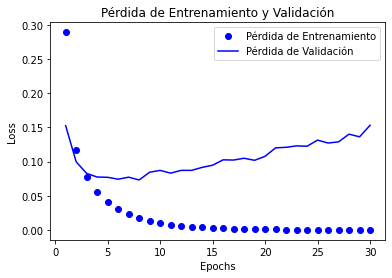

In [88]:
pinta_perdida_entrenamiento_validacion(historia0)

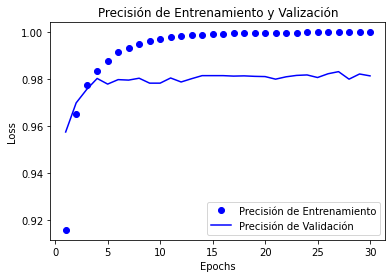

In [89]:
pinta_precision_entrenamiento_validacion(historia0)

### Caso 1: Con regularizador l1

In [90]:
network1 = crea_modelo(1)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 512)               401920    
                                                                 
 dense_15 (Dense)            (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [91]:
network1 = compila_modelo(network1)

In [ ]:
historia1 = entrena_modelo(network1)

Epoch 1/30
391/391 [==============================] - 3s 5ms/step - loss: 2.1586 - accuracy: 0.8403 - val_loss: 1.0038 - val_accuracy: 0.8828
Epoch 2/30
391/391 [==============================] - 2s 4ms/step - loss: 0.9719 - accuracy: 0.8775 - val_loss: 0.9254 - val_accuracy: 0.8891
Epoch 3/30
391/391 [==============================] - 1s 4ms/step - loss: 0.8461 - accuracy: 0.8995 - val_loss: 0.8155 - val_accuracy: 0.9009
Epoch 4/30
391/391 [==============================] - 2s 4ms/step - loss: 0.7702 - accuracy: 0.9120 - val_loss: 0.7465 - val_accuracy: 0.9170
Epoch 5/30
391/391 [==============================] - 1s 4ms/step - loss: 0.7136 - accuracy: 0.9226 - val_loss: 0.6836 - val_accuracy: 0.9326
Epoch 6/30
391/391 [==============================] - 1s 4ms/step - loss: 0.6761 - accuracy: 0.9295 - val_loss: 0.6395 - val_accuracy: 0.9437
Epoch 7/30
391/391 [==============================] - 2s 4ms/step - loss: 0.6472 - accuracy: 0.9350 - val_loss: 0.6364 - val_accuracy: 0.9411
Epoch 

In [ ]:
pinta_perdida_entrenamiento_validacion(historia1)

In [ ]:
pinta_precision_entrenamiento_validacion(historia1)

### Caso 2: Con regularizador l2

In [ ]:
network2 = crea_modelo(2)

In [ ]:
network2 = compila_modelo(network2)

In [ ]:
historia2 = entrena_modelo(network2)

In [ ]:
pinta_perdida_entrenamiento_validacion(historia2)

In [ ]:
pinta_precision_entrenamiento_validacion(historia2)

### Caso 3: Con regularizador l1_l2

In [ ]:
network3 = crea_modelo(3)

In [ ]:
network3 = compila_modelo(network3)

In [ ]:
historia3 = entrena_modelo(network3)

In [ ]:
pinta_perdida_entrenamiento_validacion(historia3)

In [ ]:
pinta_precision_entrenamiento_validacion(historia3)

### Caso 4: Con Droput

In [ ]:
network4 = crea_modelo(4)

In [ ]:
network4 = compila_modelo(network4)

In [ ]:
historia4 = entrena_modelo(network4)

In [ ]:
pinta_perdida_entrenamiento_validacion(historia4)

In [ ]:
pinta_precision_entrenamiento_validacion(historia4)

### Caso 5: Error de código de regularizador

In [ ]:
network5 = crea_modelo(5)

Error: Código de regularizador debe estar entre 0 y 4


### CONCLUSIONES